<a href="https://colab.research.google.com/github/youtsumi/ZernikePlot/blob/main/Zernike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
a=[ [i]*(2*i+1) for i in range(4)]
N = [item for sublist in a for item in sublist]
b=[ list(range(-i,i+1)) for i in range(4)]
M = [item for sublist in b for item in sublist]
N, M

([0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
 [0, -1, 0, 1, -2, -1, 0, 1, 2, -3, -2, -1, 0, 1, 2, 3])

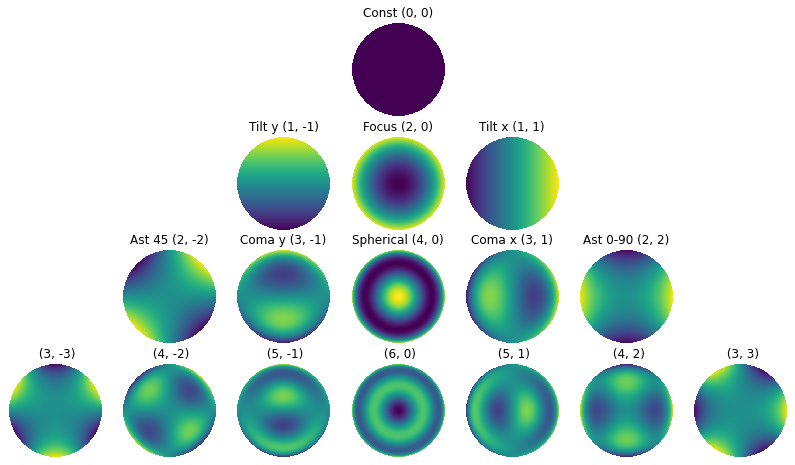

/usr/local/lib/python3.7/dist-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/usr/local/lib/python3.7/dist-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


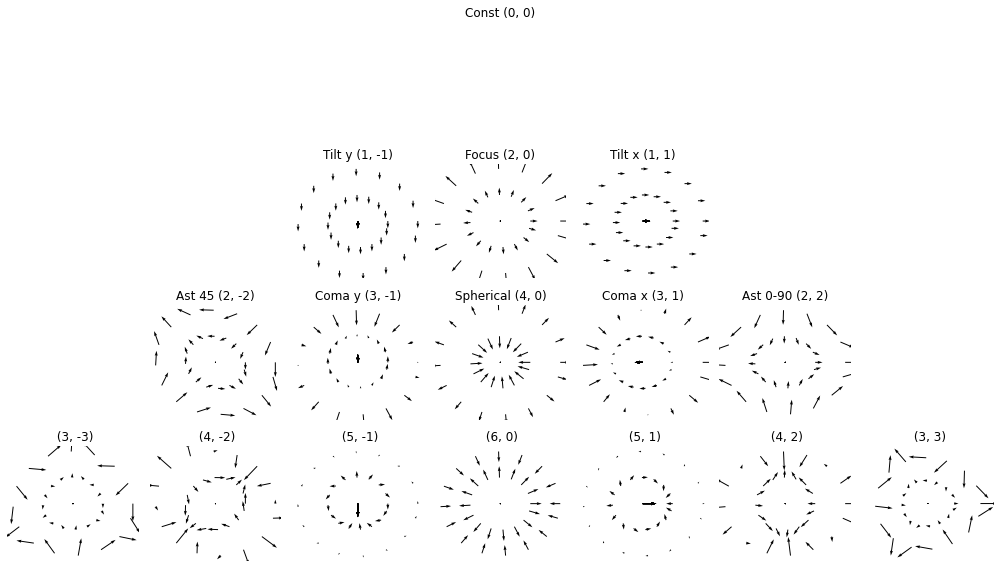

In [2]:
import numpy
from scipy.special import factorial as fact
from numpy import exp, cos, sin, pi, sqrt, arctan2, fabs, ceil, floor
import pylab

order=[
  (0,0,"Const"),

  (1,-1,"Tilt y"),
  (2,0,"Focus"),
  (1,1,"Tilt x"),

  (2,-2,"Ast 45"),
  (3,-1,"Coma y"),
  (4,0,"Spherical"),
  (3,1,"Coma x"),
  (2,2,"Ast 0-90"),

  (3,-3,""),
  (4,-2,""),
  (5,-1,""),
  (6,0,""),
  (5,1,""),
  (4,2,""),
  (3,3,"")
	    ]

def Z_r(n,m,r):
    z_r=numpy.sum(
	[ numpy.power(-1.,k)*fact(n-k)*numpy.power(r,n-2.*k) \
	    / ( fact(k)*fact((n+m)/2.-k)*fact((n-m)/2.-k))
	for k in numpy.arange(0, (n-m)/2+1)  ],
	axis=0)
    return numpy.array(z_r,dtype=numpy.float64)

def Z_xy(n,m,x,y):
    r = sqrt(x**2+y**2)
    th = arctan2(y,x)
    if m>=0:
        zr=Z_r(n,fabs(m),r)*cos(m*th)
    else:
        zr=Z_r(n,fabs(m),r)*sin(m*th)
    zr[numpy.where(r>1.)]=numpy.nan
    return zr

def showZernikeEigen():
    figs, axs = pylab.subplots(4, 7, figsize=(14,8), facecolor="white")
    for i,(n,m,name) in enumerate( order ):
      ax=axs[N[i]][M[i]+3]
      ax.set_title(f"{name} ({n}, {m})")
      x=numpy.arange(-1,1.01,0.01)
      y=numpy.arange(-1,1.01,0.01)
      X,Y=numpy.meshgrid(x,y)
      zr = Z_xy(n,m,X,Y)
      ax.imshow(zr,extent=[-1,1,-1,1])
    for ax in axs.flatten():
      ax.axis('off')
    pylab.show()

def showdiff():
    figs, axs = pylab.subplots(4, 7, figsize=(14,8), facecolor="white")
    for i,(n,m,name) in enumerate( order ):
      ax=axs[N[i]][M[i]+3]
      ax.set_title(f"{name} ({n}, {m})")
      ax.quiver(*diff(n,m))
      pylab.xlim(-1,1)
      pylab.ylim(-1,1)
    for ax in axs.flatten():
      ax.axis('off')

    pylab.tight_layout()
    pylab.show()

def diff(n,m):
    dx=1e-6
    dy=1e-6
    r = numpy.arange(0,1,0.4)
    th = numpy.arange(0,2*pi,0.4)
    x = numpy.outer(r,cos(th))
    y = numpy.outer(r,sin(th))
    Dx=(Z_xy(n,m,x+0.5*dx,y)-Z_xy(n,m,x-0.5*dx,y))/dx
    Dy=(Z_xy(n,m,x,y+0.5*dy)-Z_xy(n,m,x,y-0.5*dy))/dy
    return (x,y,Dx,Dy)

if __name__ == "__main__":
    showZernikeEigen()
    showdiff()